<h3><b>This notebook contains the generalized mixed effects models for the perseverative errors with video ratings hypothesis test</b></h3>
<p>It details the both the model selection procedure and the final hypothesis test</p>
<li>Selecting best fitting probability function for the generalized model (gamma or inverse gaussian)
<li>Selecting the best fitting link function for the model (log, identity or inverse)
<li>Selecting the best fitting random effects structure for the model (random intercepts and by-participant random slopes - as was done in the original analyses)
<li>Selecting the best fitting covariate structure (age, sex, working memory)
<p>This will be done by comparing model fit with BIC scores (as before)</p>
<p>Results will then be reported for only the <b>best fitting model</b></p>
<br>
<p>NB this notebook is run in r (rather than python - as previous analysis notebooks were) - due to better implementation of generalized mixed effects models in r </p>

In [12]:
library(tidyverse)
library(lme4)
library(ggplot2)
task_summary <- read.csv("U:/Documents/Disgust learning project/github/disgust_reversal_learning-final/csvs/dem_vids_task_excluded.csv")

In [13]:
#transform variable to all be above 0
task_summary$pos_perseverative_er <- task_summary$mean_perseverative_er + 0.01 ##+0.01 as all values must be positive (i.e., can't have 0s)

Determine the best link and probability function
<p>As before, commented out models did not converge

In [5]:
##firstly we test whether model should use a gamma or inverse gaussian probability function
##and whether the link function should be identity or inverse
gamma_log <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=Gamma(link="log"))
gamma_inverse <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=Gamma(link="inverse"))
#gamma_identity <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=Gamma(link="identity"))

#invgaus_log <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=inverse.gaussian(link="log"))
invgaus_inverse <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=inverse.gaussian(link="inverse"))
#invgaus_identity <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=inverse.gaussian(link="identity"))

boundary (singular) fit: see help('isSingular')



                       Model      BIC
2            Gamma (inverse) 1630.528
1                Gamma (log) 1634.188
3 Inverse gaussian (inverse) 2780.066


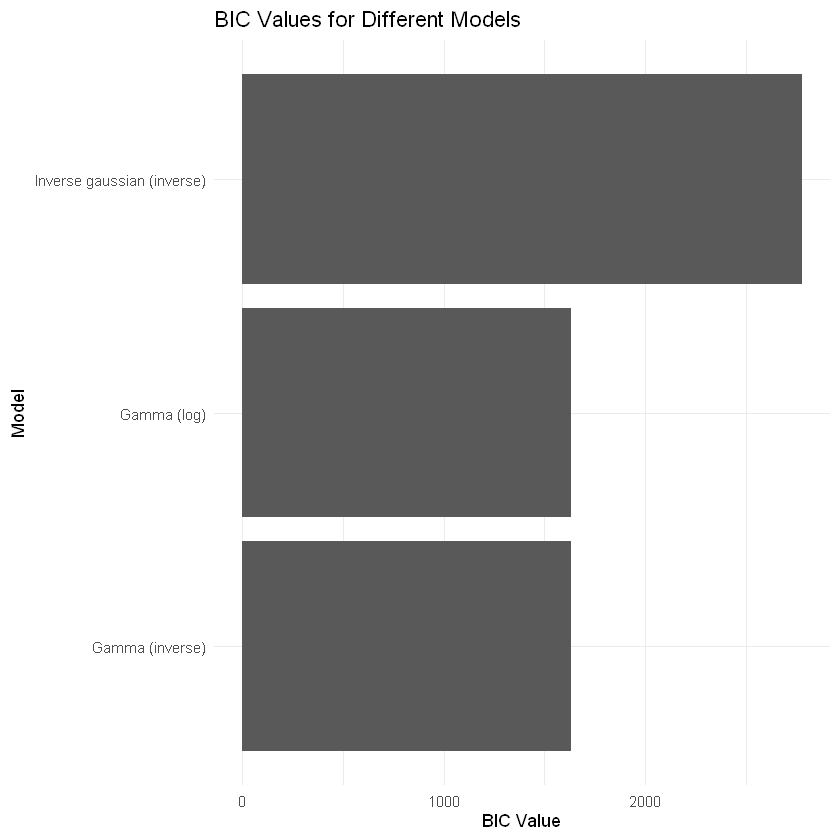

In [6]:
bic_values <- c(
  BIC(gamma_log),
  BIC(gamma_inverse),
  BIC(invgaus_inverse)
)
model_names <- c("Gamma (log)", "Gamma (inverse)", "Inverse gaussian (inverse)")

bic_df <- data.frame(Model = model_names, BIC = bic_values)

bic_df <- bic_df[order(bic_df$BIC), ]

# Plot the BIC values
ggplot(bic_df, aes(x = reorder(Model, BIC), y = BIC)) +
  geom_bar(stat = "identity") + 
  labs(title = "BIC Values for Different Models",
       x = "Model",
       y = "BIC Value") +
  theme_minimal() +
  coord_flip() 
print(bic_df) ##Gamma (inverse) wins

Use this model and determine best random effects structure (as done before with linear mixed effects models in the python notebooks)

In [7]:
basic_model <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=Gamma(link="inverse"))

#feedback_randint <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|feedback_details), data=task_summary, family=Gamma(link="inverse"))
fractals_randint <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|fractals), data=task_summary, family=Gamma(link="inverse"))
#feedback_fractals_randint <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|fractals) + (1|feedback_details), data=task_summary, family=Gamma(link="inverse"))

#randslope <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (block_type|participant_no), data=task_summary, family=Gamma(link="inverse"))
feedback_randint_randslope <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (block_type|participant_no) + (1|feedback_details), data=task_summary, family=Gamma(link="inverse"))
#feedback_fractals_randint_randslope <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (block_type|participant_no) + (1|feedback_details) + (1|fractals), data=task_summary, family=Gamma(link="inverse"))

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



                       Model      BIC
1                basic model 1630.528
2           fractals_randint 1637.456
3 feedback_randint_randslope 1671.711


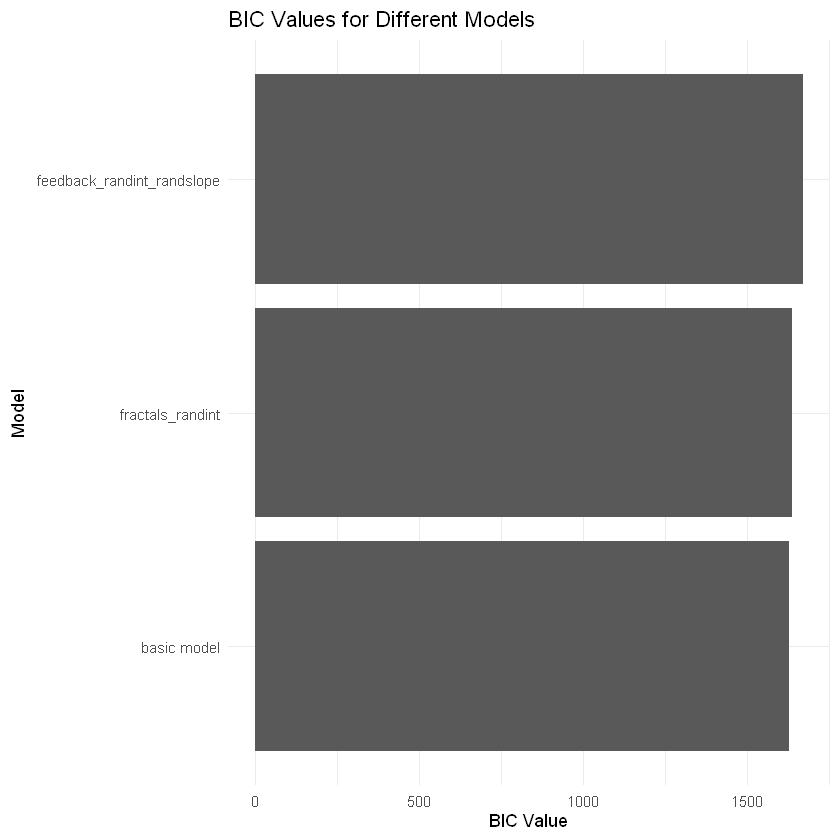

In [8]:
bic_values <- c(
  BIC(basic_model),
  BIC(fractals_randint),
  BIC(feedback_randint_randslope)
)
model_names <- c("basic model", "fractals_randint", "feedback_randint_randslope")

bic_df <- data.frame(Model = model_names, BIC = bic_values)

bic_df <- bic_df[order(bic_df$BIC), ]

# Plot the BIC values
ggplot(bic_df, aes(x = reorder(Model, BIC), y = BIC)) +
  geom_bar(stat = "identity") + 
  labs(title = "BIC Values for Different Models",
       x = "Model",
       y = "BIC Value") +
  theme_minimal() +
  coord_flip() 
print(bic_df) ##basic model is the best fit

And now identify the best covariate structure

In [9]:
no_covariate <- basic_model
sex_covariate <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + prolific_sex, data=task_summary, family=Gamma(link="inverse"))
#age_covariate <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + prolific_age, data=task_summary, family=Gamma(link="inverse"))
digit_span_covariate <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + digit_span, data=task_summary, family=Gamma(link="inverse"))
#sex_age_covariate <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + prolific_sex + prolific_age, data=task_summary, family=Gamma(link="inverse"))
#sex_digit_span_covariate <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + prolific_sex + digit_span, data=task_summary, family=Gamma(link="inverse"))
#digit_span_age_covariate <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + prolific_age + digit_span, data=task_summary, family=Gamma(link="inverse"))
#sex_digit_span_age_covariate <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + prolific_age + prolific_sex + digit_span, data=task_summary, family=Gamma(link="inverse"))

                 Model      BIC
1         no_covariate 1630.528
3 digit_span_covariate 1637.249
2        sex_covariate 1637.379


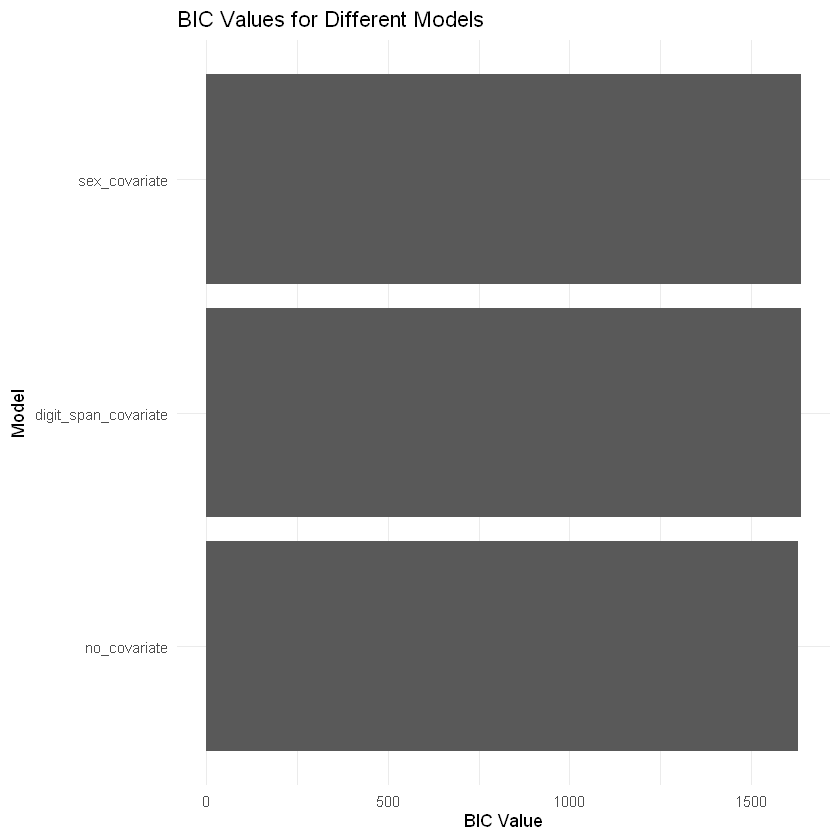

In [10]:
bic_values <- c(
  BIC(no_covariate),
  BIC(sex_covariate),
  BIC(digit_span_covariate)
)
model_names <- c("no_covariate", "sex_covariate", "digit_span_covariate")

bic_df <- data.frame(Model = model_names, BIC = bic_values)

bic_df <- bic_df[order(bic_df$BIC), ]

# Plot the BIC values
ggplot(bic_df, aes(x = reorder(Model, BIC), y = BIC)) +
  geom_bar(stat = "identity") + 
  labs(title = "BIC Values for Different Models",
       x = "Model",
       y = "BIC Value") +
  theme_minimal() +
  coord_flip() 
print(bic_df) ##no covariate is best

Hypothesis test with the winning model

In [11]:
summary(no_covariate)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Gamma  ( inverse )
Formula: pos_perseverative_er ~ block_type + valence_diff + arousal_diff +  
    valence_habdiff + (1 | participant_no)
   Data: task_summary

     AIC      BIC   logLik deviance df.resid 
  1591.1   1630.5   -787.6   1575.1     1012 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2639 -0.7127 -0.2102  0.5384  3.9164 

Random effects:
 Groups         Name        Variance Std.Dev.
 participant_no (Intercept) 0.1426   0.3776  
 Residual                   0.6140   0.7836  
Number of obs: 1020, groups:  participant_no, 340

Fixed effects:
                   Estimate Std. Error t value Pr(>|z|)    
(Intercept)       1.3221837  0.0794095  16.650   <2e-16 ***
block_typeFear    0.1331227  0.0795042   1.674   0.0940 .  
block_typePoints  0.1892452  0.0824777   2.295   0.0218 *  
valence_diff      0.0189348  0.0284999   0.664   0.5064    
arousal_diff      0.